In [2]:
import pandas as pd
import numpy as np
import pymf
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
leaf_train_data = pd.read_csv('train.csv')

In [4]:
leaf_train_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [25]:
leaf_mat = leaf_train_data.loc[:,'margin1':'texture64'].values
leaf_mat.shape

(990, 192)

In [26]:
# probably want to normalize columns...?

mean = np.mean(leaf_mat, axis=0)
leaf_mat = leaf_mat - mean

norm = np.linalg.norm(leaf_mat, axis=0)
leaf_mat = leaf_mat / norm

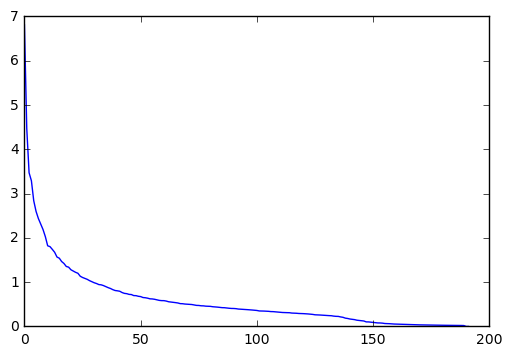

In [27]:
# plot spectrum 
u,s,v = np.linalg.svd(leaf_mat)
plt.plot(s)

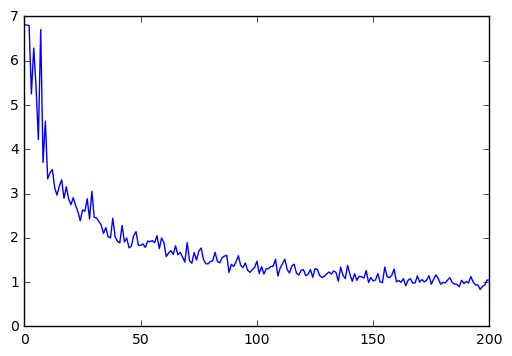

In [28]:
# CUR decompositions
spec_err = np.zeros(201)
spec_err[0] = np.linalg.norm(leaf_mat, 2)
for i in range(1,201):
    cur_leaf = pymf.CUR(leaf_mat, rrank=i, crank=i)
    cur_leaf.factorize()
    err = np.linalg.norm(leaf_mat - np.dot(cur_leaf._C, np.dot(cur_leaf._U, cur_leaf._R)), 2)
    spec_err[i] = err

# plot spectral norm error for CUR(r) decomposition
plt.plot(spec_err)

In [29]:
def match_col(A, C):
    r = C.shape[1]
    inds = np.zeros(r)
    for i in range(0,r):
        for j in range(0, A.shape[1]):
            diff = np.abs(A[:,j]-C[:,i])
            if np.sum(diff) <= 0.0:
                inds[i] = j
                break
    return inds

In [30]:
# r = 50 seems like a good cutoff... 10 randomized runs

r = 50
n = 10

inds_count = {}
for i in range(0,n):
    cur_leaf = pymf.CUR(leaf_mat, rrank=r, crank=r)
    cur_leaf.factorize()
    inds = np.unique(match_col(leaf_mat, cur_leaf._C))
    for j in range(0,inds.shape[0]):
        if inds[j] in inds_count:
            inds_count[int(inds[j])] = inds_count[int(inds[j])]+1
        else:
            inds_count[int(inds[j])] = 1

In [31]:
sorted_ind_count = sorted(inds_count, key=inds_count.__getitem__, reverse=True)

fname_dict = {0 : 'margin', 1 : 'shape', 2 : 'texture'}
for i in range(0,50):
    fname = np.floor(sorted_ind_count[i]/64)
    fval = int(sorted_ind_count[i] - fname*64 + 1)
    print(str(sorted_ind_count[i])+' --> '+fname_dict[fname]+str(fval))

128 --> texture1
17 --> margin18
121 --> shape58
142 --> texture15
152 --> texture25
11 --> margin12
25 --> margin26
30 --> margin31
31 --> margin32
32 --> margin33
33 --> margin34
35 --> margin36
48 --> margin49
57 --> margin58
60 --> margin61
62 --> margin63
66 --> shape3
67 --> shape4
77 --> shape14
82 --> shape19
90 --> shape27
91 --> shape28
97 --> shape34
108 --> shape45
113 --> shape50
133 --> texture6
137 --> texture10
151 --> texture24
173 --> texture46
174 --> texture47
176 --> texture49
182 --> texture55
1 --> margin2
9 --> margin10
12 --> margin13
15 --> margin16
19 --> margin20
24 --> margin25
28 --> margin29
38 --> margin39
39 --> margin40
41 --> margin42
42 --> margin43
49 --> margin50
53 --> margin54
54 --> margin55
56 --> margin57
61 --> margin62
64 --> shape1
68 --> shape5
